# DS 3000 HW 5

Due: Sun Mar 13 @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file to [gradescope](https://www.gradescope.com/courses/337250).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the `ipynb` file to gradescope.

### Tips for success
- Start early
- Make use of [Piazza](https://course.ccs.neu.edu/ds3000/admin.html#piazza-discussion-forum)
- Make use of [Office Hours](https://course.ccs.neu.edu/ds3000/office_hours.html)
- Remember that [Documentation / style counts for credit](https://course.ccs.neu.edu/ds3000/style_guide.html)
- Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](https://course.ccs.neu.edu/ds3000/syllabus.html#academic-integrity-and-conduct)

# NUFlex Seating

This HW deals with NUFlex seating data from the 2021 section of DS3000.  The data describes how many students requested and were permitted to join class in person for each lesson by the NUFlex system.

## Pseudonymizing data

Its often the case that we 'Pseudonymize' (use random fake pseudonyms instead of personally identifiable information) a dataset by storing a code which maps some sensitive information to a consistent tag.

|   |                  Week |   CRN | Subject |                 Course Name | Student ID | Remote Learner | Mon |     Tue | Wed | Thu |     Fri | Sat | Sun |
|--:|----------------------:|------:|--------:|----------------------------:|-----------:|---------------:|----:|--------:|----:|----:|--------:|----:|----:|
| 0 | 02/22/2021-02/28/2021 | 35214 |      DS | Foundations of Data Science |   91132339 |              No | NaN | REM Yes | NaN | NaN | REM Yes | NaN | NaN |
| 1 | 02/08/2021-02/14/2021 | 35214 |      DS | Foundations of Data Science |   91132339 |              No | NaN | REM Yes | NaN | NaN | REM Yes | NaN | NaN |
| 2 | 02/15/2021-02/21/2021 | 35214 |      DS | Foundations of Data Science |   91132339 |              No | NaN | REM Yes | NaN | NaN | REM Yes | NaN | NaN |
| 3 | 01/18/2021-01/24/2021 | 35214 |      DS | Foundations of Data Science |   91132339 |              No | NaN |  INP No | NaN | NaN |  INP No | NaN | NaN |
| 4 | 03/01/2021-03/07/2021 | 35214 |      DS | Foundations of Data Science |   91132339 |              No | NaN | REM Yes | NaN | NaN | REM Yes | NaN | NaN |

To protect student privacy, this data has already been pseudonymized by replacing all NUIDs with random 9 digit numbers.

Note that there is a difference between:
- **pseudonymization** (changing everyone's name to a pseudonym)
- **anonymization**  (ensuring no individual can be uniquely identified within the data)

Briefly, if a single student was known to be the only one who requested in person attendance on a particular day then changing their name to a pseudonym is insufficient to protect their privacy within this data.  [This link](https://gathercapture.com/latest/anonymous-pseudonymous-data-are-they-important) contains further details, though its not necessary for this HW.

### Generating a pseudonym
[Universally Unique Identifiers](https://en.wikipedia.org/wiki/Universally_unique_identifier) is a CS term for a unique name:

In [1]:
from uuid import uuid4

# a good random pseudonym/alias
str(uuid4())

'fd85b253-8792-4ceb-a2d3-64b8ef02ffc3'

In [2]:
# a good enough random alias for us (doesn't need to be as long to be unique)
str(uuid4())[:6]

'0f1b9d'

You can read more about the process in the [python docs for uuid4()](https://docs.python.org/3/library/uuid.html#uuid.uuid4) but its sufficient to know that there are so many unique output strings of `uuid4()` that we can assume no two calls return the same id.

## Part 1: 16 points

Pseudonymize `df_nuflex` (again) by completing the tasks below:

1. Load `nuflex_ds3000_Mar5_noname.csv` to a DataFrame
1. Write a `pseudonymize_col()` function which:
    * accepts a DataFrame and the name of one of its columns
    * returns `pseudo_map_dict`
        - keys are the unique items observed in original column of dataframe
        - values are the new pseudnyms
    * operates `inplace` by modifying the input DataFrame to replacing each item in the given column with its corresponding pseudonym
    
Note that the pseudonymiaztion must be consistent: all observations of a particular student ID in the original DataFrame are replaced with an identical pseudonym

1. call `pseudonymize_col()` and save the resulting `df_nuflex` as `nuflex_ds3000_Mar5_anon.csv`

[This example](https://colab.research.google.com/drive/1VdikAnXZEBx3tGxclDG-BC-psr_D_DBN?usp=sharing) may help clarify the expected behavior of `pseudonymize_col()`.

Notice that we save `pseudo_map_dict` to ensure the pseudonymiazation can be undone.  What if some medical study uncovers a health problem with a participant and must contact them?  A study should be able to "undo" the pseudonymization to recover the original participants identiy.

In [3]:
import numpy as np
import pandas as pd

In [4]:
# loading nuflex_ds3000_Mar5_noname.csv to a DataFrame
df_nuflex = pd.read_csv('nuflex_ds3000_Mar5_noname.csv')
df_nuflex.head()

,Week,CRN,Subject,Course Name,Student ID,Remote Learner,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,02/22/2021-02/28/2021,35214,DS,Foundations of Data Science,417693032,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN
1,02/08/2021-02/14/2021,35214,DS,Foundations of Data Science,417693032,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN
2,02/15/2021-02/21/2021,35214,DS,Foundations of Data Science,417693032,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN
3,01/18/2021-01/24/2021,35214,DS,Foundations of Data Science,417693032,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN
4,03/01/2021-03/07/2021,35214,DS,Foundations of Data Science,417693032,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN


In [5]:
# pseudonymize_col() function 
def pseudonymize_col(df, col):
    """ accepts a DataFrame and the name of one of its columns and returns pseudo_map_dict
        where keys are the unique items observed in original column of dataframe and values are the new pseudnyms.
        operates inplace by modifying the input DataFrame to replacing each item in the given column with its corresponding pseudonym.
        
    Args:
        df (pd.DataFrame): dataframe with column of values to be replaced with pseudonyms
        col (str): name of the column (in df) whose values are to be replaced with pseudonyms
        
    Returns:
        pseudo_map_dict (dict): dictionary containing keys that are the unique items observed in the 
            original column of the df and values that are the new pseudonyms 
        
    """
    # get desired column from df
    df_col = df[col]
    
    # get unique values from the desired column
    unique_col_vals = df_col.unique()
    
    # put unique values from column into unique list
    unique_col_list = list(unique_col_vals)
    
    # initialize dict
    pseudonym_map_dict = {}
    
    # create pseudonym for each value in unique_col_list
    for val in unique_col_list:
        pseudonym_map_dict[val] = str(uuid4())[:6]
        
    # replace each unique key with pseudonym
    for row in df_col:
        new_row = pseudonym_map_dict.get(row)
        df.replace(row, new_row, inplace = True)
        
    # return dictionary with pseudonym values
    return pseudonym_map_dict

In [6]:
# call pseudonymize_col() 
pseudonymize_col(df_nuflex, 'Student ID')

{417693032: '6b8f74',
 243580377: 'f38977',
 987744431: 'bad630',
 636393365: 'f9290e',
 515770817: 'cc558c',
 768281748: '88f160',
 37003809: '38f4b4',
 885408952: 'ae7c2d',
 481447463: '180ef9',
 858778667: '19e198',
 944072762: 'a6013e',
 2946945: '430c47',
 576702668: 'd9d8b3',
 351544501: '837852',
 474057614: '29d069',
 509920705: '19aec7',
 412739491: 'a4e579',
 450308072: '04256a',
 470060416: 'de52dc',
 722565855: '94d333',
 38521395: '765a9a',
 356965413: '5ff7ab',
 632108113: 'c5aff2',
 226866548: '9f5e85',
 299008771: '4e75eb',
 627487328: '85ae9e',
 773332798: '7b9ded',
 73116247: 'e40749',
 565799062: '6d1977',
 885122494: 'a5548d',
 82434170: '37d4f3',
 506872400: '05168f',
 446877022: '09446c',
 144418679: '01fecc',
 606723844: '1a4b84',
 875694808: '287671',
 391443878: '4d8193',
 716604634: '79acca',
 693193654: '8601b2',
 529529752: '8fe7fd',
 71416586: 'c5e01c',
 737143853: '3a1d66',
 734381825: '01675f',
 464942527: 'f7de96',
 521745785: '55cfc1',
 153041700: 'c877

In [7]:
df_nuflex.head()

,Week,CRN,Subject,Course Name,Student ID,Remote Learner,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,02/22/2021-02/28/2021,35214,DS,Foundations of Data Science,6b8f74,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN
1,02/08/2021-02/14/2021,35214,DS,Foundations of Data Science,6b8f74,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN
2,02/15/2021-02/21/2021,35214,DS,Foundations of Data Science,6b8f74,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN
3,01/18/2021-01/24/2021,35214,DS,Foundations of Data Science,6b8f74,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN
4,03/01/2021-03/07/2021,35214,DS,Foundations of Data Science,6b8f74,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN


In [8]:
# save the resulting dataframe as nuflex_ds3000_Mar5_anon.csv
df_nuflex.to_csv('nuflex_ds3000_Mar5_anon.csv')

## Part 2: Data cleaning

The dataframe, so far, looks something like:

|   |                  Week |   CRN | Subject |                 Course Name | Remote Learner | Mon |     Tue | Wed | Thu |     Fri | Sat | Sun |  Student ID |
|--:|----------------------:|------:|--------:|----------------------------:|---------------:|----:|--------:|----:|----:|--------:|----:|----:|-------:|
| 0 | 02/22/2021-02/28/2021 | 35214 |      DS | Foundations of Data Science |             No | NaN | REM Yes | NaN | NaN | REM Yes | NaN | NaN | 50f8a6 |
| 1 | 02/08/2021-02/14/2021 | 35214 |      DS | Foundations of Data Science |             No | NaN | REM Yes | NaN | NaN | REM Yes | NaN | NaN | 50f8a6 |
| 2 | 02/15/2021-02/21/2021 | 35214 |      DS | Foundations of Data Science |             No | NaN | REM Yes | NaN | NaN | REM Yes | NaN | NaN | 50f8a6 |
| 3 | 01/18/2021-01/24/2021 | 35214 |      DS | Foundations of Data Science |             No | NaN |  INP No | NaN | NaN |  INP No | NaN | NaN | 50f8a6 |
| 4 | 03/01/2021-03/07/2021 | 35214 |      DS | Foundations of Data Science |             No | NaN | REM Yes | NaN | NaN | REM Yes | NaN | NaN | 50f8a6 |

We'll need to do a bit of work to clean things up.  When we're done with the steps below the dataframe should look similar to:

|   |   CRN | Remote Learner |  Student ID | week start | Tue:INP Request | Tue:INP Permit | Fri:INP Request | Fri:INP Permit |
|--:|------:|---------------:|-------:|-----------:|----------------:|---------------:|----------------:|---------------:|
| 0 | 35214 |          False | f5c568 | 2021-02-22 |           False |          False |           False |          False |
| 1 | 35214 |          False | f5c568 | 2021-02-08 |           False |          False |           False |          False |
| 2 | 35214 |          False | f5c568 | 2021-02-15 |           False |          False |           False |          False |
| 3 | 35214 |          False | f5c568 | 2021-01-18 |            True |          False |            True |          False |
| 4 | 35214 |          False | f5c568 | 2021-03-01 |           False |          False |           False |          False |

### Part 2.1 (6 points)
Discard all columns which are exclusively `NaN`, these aren't informative and are cluttering our notebook up.

In [9]:
# discard all columns which are exclusively NaN
df_nuflex.dropna(axis = 1, how = 'all', inplace = True)
df_nuflex.head()

,Week,CRN,Subject,Course Name,Student ID,Remote Learner,Tue,Fri
0,02/22/2021-02/28/2021,35214,DS,Foundations of Data Science,6b8f74,No,REM Yes,REM Yes
1,02/08/2021-02/14/2021,35214,DS,Foundations of Data Science,6b8f74,No,REM Yes,REM Yes
2,02/15/2021-02/21/2021,35214,DS,Foundations of Data Science,6b8f74,No,REM Yes,REM Yes
3,01/18/2021-01/24/2021,35214,DS,Foundations of Data Science,6b8f74,No,INP No,INP No
4,03/01/2021-03/07/2021,35214,DS,Foundations of Data Science,6b8f74,No,REM Yes,REM Yes


### Part 2.2 (9 points)
The `Remote Learner` column contains strings 'yes' and 'no'.  `.replace()` these entries with boolens ('yes'-> `True`, 'no' -> `False`).

In [10]:
# replace 'yes' and 'no' with boolean values (True and False) in the remote learner column

# remote learner column
df_nuf_remote = df_nuflex['Remote Learner']

# replace Yes wit True and No with False in Remote Learner column
# alter original df
for learner in df_nuf_remote:
    if learner == 'Yes':
        df_nuflex.replace(learner, True, inplace = True)
    else: 
        df_nuflex.replace(learner, False, inplace = True)

df_nuflex.head()

,Week,CRN,Subject,Course Name,Student ID,Remote Learner,Tue,Fri
0,02/22/2021-02/28/2021,35214,DS,Foundations of Data Science,6b8f74,False,REM Yes,REM Yes
1,02/08/2021-02/14/2021,35214,DS,Foundations of Data Science,6b8f74,False,REM Yes,REM Yes
2,02/15/2021-02/21/2021,35214,DS,Foundations of Data Science,6b8f74,False,REM Yes,REM Yes
3,01/18/2021-01/24/2021,35214,DS,Foundations of Data Science,6b8f74,False,INP No,INP No
4,03/01/2021-03/07/2021,35214,DS,Foundations of Data Science,6b8f74,False,REM Yes,REM Yes


### Part 2.3 (12 points)
`.map()` the `Week` column (containing strings) to a new `week start` column which contains `datetime.date()` objects corresponding to the first day of the first date given in `Week`.
- for example, the string `'02/22/2021-02/28/2021'` should be mapped to `datetime(year=2021, month=2, day=22).date()`
- use `DataFrame.map()` with a `get_week_start()` function you implement and document

Be sure that your `get_week_start()` function:
- is properly documented
    - docstring
    - commenets
    - code "chunking" with whitespace
- is tested with an `assert` statement you write
    - feel free to "steal" the test case right out of the problem description above!
    

In [11]:
from datetime import datetime

In [12]:
# get_week_start() function
def get_week_start(date_str):
    """ create a datetime.date() object corresponding to the first day 
        of the first date given in Week of the given string.
        
    Args:
        date_str (str): the given string of the date, it is the first day to be converted
        
    Returns:
        week_start_dt (datetime.date): datetime object corresponding to the first day of the first given date in 
                                       the given string
    """
    # create a list by splitting up given string into two dates
    date_str = date_str.split('-')
    
    # convert first date in the list to a datetime
    week_start_datetime = datetime.strptime(date_str[0], '%m/%d/%Y').date()
    
    # return first date as a datetime object
    return week_start_datetime

In [13]:
# convert given string to datetime with get_week_start()
week_start_datetime = get_week_start('03/06/2022-03/12/2022')

# expected 
expected_week_start_datetime = datetime(year=2022, month=3, day=6).date()

# assert statement
assert week_start_datetime == expected_week_start_datetime

In [14]:
week_start_datetime = get_week_start('03/06/2022-03/12/2022')
week_start_datetime

datetime.date(2022, 3, 6)

In [15]:
# .map() the Week column (containing strings) to a new week start column which contains datetime.date() 
# objects corresponding to the first day of the first date given in Week.
df_nuflex['week start'] = df_nuflex['Week'].map(get_week_start)

df_nuflex.head()

,Week,CRN,Subject,Course Name,Student ID,Remote Learner,Tue,Fri,week start
0,02/22/2021-02/28/2021,35214,DS,Foundations of Data Science,6b8f74,False,REM Yes,REM Yes,2021-02-22
1,02/08/2021-02/14/2021,35214,DS,Foundations of Data Science,6b8f74,False,REM Yes,REM Yes,2021-02-08
2,02/15/2021-02/21/2021,35214,DS,Foundations of Data Science,6b8f74,False,REM Yes,REM Yes,2021-02-15
3,01/18/2021-01/24/2021,35214,DS,Foundations of Data Science,6b8f74,False,INP No,INP No,2021-01-18
4,03/01/2021-03/07/2021,35214,DS,Foundations of Data Science,6b8f74,False,REM Yes,REM Yes,2021-03-01


### Part 2.4 (20 points)

The data encoding in columns `Tue` and `Fri` is a bit funny to follow:

| Original Encoding        | INP Request | INP Permit |
|---------|-------------|------------|
| INP Yes | True        | True       |
| INP No  | True        | False      |
| REM Yes | False       | False      |
| REM No  | False       | True       |

where `INP Request` is True when the student requested in person attendance and `INP Permit` is True when the student was permitted to attend class.

Add the following columns to `df_nuflex`:
- `Tue:INP Request`
- `Tue:INP Permit`
- `Fri:INP Request`
- `Fri:INP Permit` 

Accomplish this by `.map()`ing appropriate input columns via:
- `get_inp_permit()`
- `get_inp_request()`

functions which you write.

For each of these two functions:
- be sure it is properly documented:
    - docstring
    - commenets
    - code "chunking" with whitespace
- be sure it is properly tested
    - `assert` that each of the four original input rows in the table above is mapped to the appropriate output

In [16]:
# get_inp_permit()
def get_inp_permit(permit_str):
    """ determines if the student is permitted to attend in-person class from
        given string, returning a boolean.
        
    Args:
        permit_str (str): string indicating if the student was permitted attendance
        
    Returns:
        bool_permit (boolean): a boolean that indicates whether the student was permitted attendance or not
                               True = permitted, False = not permitted
    """
    
    # split string by space
    permit_str = permit_str.split(' ')
    
    # determine if string is INP or REM
    
    # 0th item = INP, student requests in-person
    if permit_str[0] == 'INP':
        
        # in-person attendance permitted
        if permit_str[1] == 'Yes':
            bool_permit = True
            
        # in-person attendance not permitted
        else:
            bool_permit = False
    
    # 0th item = REM, student requests remote
    if permit_str[0] == 'REM':
        
        # remote attendance permitted
        if permit_str[1] == 'Yes':
            bool_permit = False
            
        # remote attendance not permitted, student given in-person
        else:
            bool_permit = True
    
    # return student assigned seating (in-person vs remote)
    return bool_permit

In [17]:
# check with assert statement that table above has correctly mapped output

permit_str = 'INP Yes'
bool_permit = get_inp_permit(permit_str)
expected_bool = True

assert bool_permit == expected_bool

In [18]:
permit_str = 'INP No'
bool_permit = get_inp_permit(permit_str)
expected_bool = False

assert bool_permit == expected_bool

In [19]:
permit_str = 'REM Yes'
bool_permit = get_inp_permit(permit_str)
expected_bool = False

assert bool_permit == expected_bool

In [20]:
permit_str = 'REM No'
bool_permit = get_inp_permit(permit_str)
expected_bool = True

assert bool_permit == expected_bool

In [21]:
# get_inp_request()
def get_inp_request(request_str):
    """ determines if the student requested to attend in-person class from
        given string, returning a boolean.
        
    Args:
        request_str (str): string indicating if the student requested in-person attendance
        
    Returns:
        bool_request (boolean): a boolean that indicates whether the student requested in-person attendance or not
                               True = requested in-person, False = not requested
    """
    
    # split string by space
    request_str = request_str.split(' ')
    
    # determine if string is INP or REM
    
    # 0th item = INP, student requests in person
    if request_str[0] == 'INP':
        
        # requested in-person
        bool_request = True
    
    # 0th item = REM, student requests remote
    if request_str[0] == 'REM':
        
        # requested remote
        bool_request = False

    # return student requested assignment (in-person vs remote)
    return bool_request

In [22]:
# check with assert statement that table above has correctly mapped output

request_str = 'INP Yes'
bool_request = get_inp_request(request_str)
expected_bool = True

assert bool_request == expected_bool

In [23]:
request_str = 'INP No'
bool_request = get_inp_request(request_str)
expected_bool = True

assert bool_request == expected_bool

In [24]:
request_str = 'REM Yes'
bool_request = get_inp_request(request_str)
expected_bool = False

assert bool_request == expected_bool

In [25]:
request_str = 'REM No'
bool_permit = get_inp_request(request_str)
expected_bool = False

assert bool_permit == expected_bool

In [26]:
# adding Tue:INP Request to df_nuflex
df_nuflex['Tue: INP Request'] = df_nuflex['Tue'].map(get_inp_request)

# adding Tue:INP Permit to df_nuflex
df_nuflex['Tue: INP Permit'] = df_nuflex['Tue'].map(get_inp_permit)

# adding Fri:INP Request to df_nuflex
df_nuflex['Fri: INP Request'] = df_nuflex['Fri'].map(get_inp_request)

# adding Fri:INP Permit to df_nuflex
df_nuflex['Fri: INP Permit'] = df_nuflex['Fri'].map(get_inp_permit)

### Part 2.5 (5 points)
Finally, delete any columns which are either redundant with our cleaner format or are constant across the dataset:
    - 'Week', 'Subject', 'Course Name', 'Tue', 'Fri'
    - You can delete a DataFrame column (inplace) with:
``` python
   del data_frame[col]
```

In [27]:
# delete any columns which are redundant with our cleaner format or constant across the dataset
del df_nuflex['Week']
del df_nuflex['Subject']
del df_nuflex['Course Name']
del df_nuflex['Tue']
del df_nuflex['Fri']

df_nuflex.head()

,CRN,Student ID,Remote Learner,week start,Tue: INP Request,Tue: INP Permit,Fri: INP Request,Fri: INP Permit
0,35214,6b8f74,False,2021-02-22,False,False,False,False
1,35214,6b8f74,False,2021-02-08,False,False,False,False
2,35214,6b8f74,False,2021-02-15,False,False,False,False
3,35214,6b8f74,False,2021-01-18,True,False,True,False
4,35214,6b8f74,False,2021-03-01,False,False,False,False


# Part 3: 'Flattening' the table (20 points)

Its a bit awkward that two days worth of data are contained in every row:

|   |   CRN | Remote Learner |  Student ID | week start | Tue:INP Request | Tue:INP Permit | Fri:INP Request | Fri:INP Permit |
|--:|------:|---------------:|-------:|-----------:|----------------:|---------------:|----------------:|---------------:|
| 0 | 35214 |          False | 163ffa | 2021-02-22 |           False |          False |           False |          False |
| 1 | 35214 |          False | 163ffa | 2021-02-08 |           False |          False |           False |          False |
| 2 | 35214 |          False | 163ffa | 2021-02-15 |           False |          False |           False |          False |
| 3 | 35214 |          False | 163ffa | 2021-01-18 |            True |          False |            True |          False |
| 4 | 35214 |          False | 163ffa | 2021-03-01 |           False |          False |           False |          False |

using the given `get_next_weekday()` function below, flatten the table so that each row contains only a single day's worth of data:

|   |     CRN | Remote Learner |  Student ID |       date | permit | request |
|--:|--------:|---------------:|-------:|-----------:|-------:|--------:|
| 0 | 35214.0 |            0.0 | 163ffa | 2021-02-23 |    0.0 |     0.0 |
| 1 | 35214.0 |            0.0 | 163ffa | 2021-02-26 |    0.0 |     0.0 |
| 2 | 35214.0 |            0.0 | 163ffa | 2021-02-09 |    0.0 |     0.0 |
| 3 | 35214.0 |            0.0 | 163ffa | 2021-02-12 |    0.0 |     0.0 |
| 4 | 35214.0 |            0.0 | 163ffa | 2021-02-16 |    0.0 |     0.0 |
| 5 | 35214.0 |            0.0 | 163ffa | 2021-02-19 |    0.0 |     0.0 |
| 6 | 35214.0 |            0.0 | 163ffa | 2021-01-19 |    0.0 |     1.0 |
| 7 | 35214.0 |            0.0 | 163ffa | 2021-01-22 |    0.0 |     1.0 |
| 8 | 35214.0 |            0.0 | 163ffa | 2021-03-02 |    0.0 |     0.0 |
| 9 | 35214.0 |            0.0 | 163ffa | 2021-03-05 |    0.0 |     0.0 |

Hints: 
- One approach is to iterate row by row through the old dataframe using `DataFrame.iterrows()`.  For each row in the old dataframe you can build two rows in the new one corresponding to Tuesday and Friday's data.   
- It took our answer about ~12 seconds to compute via this row-by-row implementation, you may have to be a little patient

In [28]:
from datetime import datetime
from datetime import timedelta
from copy import copy

def get_next_weekday(date, weekday):
    """ gets closest date which is a given day of the week (mon, tues, ...)
    
    weekday encoding convention taken from:
    https://docs.python.org/3/library/datetime.html#datetime.date.weekday
    
    Args:
        date (datetime.date): input date
        weekday (int): 0 is monday and 6 is Sunday
    
    Returns:
        date_out (datetime.date): closest input date
            which is a given weekday
    """
    # check that input weekday is valid
    assert weekday in list(range(7)), 'invalid weekday'
    
    # we copy input date so we don't modify its internal state
    date_out = copy(date)
    
    # add a day until we're at a given weekday
    while date_out.weekday() != weekday:
        date_out += timedelta(days=1)
    
    return date_out

# this is a Friday
date = datetime(year=2021, month=3, day=5).date()

# this is closest thursday which follows (weekday=3)
date_out_expected = datetime(year=2021, month=3, day=11).date()

date_out = get_next_weekday(date, weekday=3)

assert date_out == date_out_expected, 'get_next_weekday() error'

In [29]:
# empty days list
class_list = []

col_names = ['CRN', 'Remote Learner', 'Student ID', 'date', 'permit', 'request']

for idx, data in df_nuflex.iterrows():
    for class_num in range(2):
        
        data_dict = dict()
        
        data_dict['CRN'] = float(data.loc['CRN'])
        data_dict['Remote Learner'] = float(data.loc['Remote Learner'])
        data_dict['Student ID'] = data.loc['Student ID']
        
        # for Tuesday
        if class_num == 0:
            data_dict['date'] = get_next_weekday(data.loc['week start'], 1)
            data_dict['permit'] = float(data.loc['Tue: INP Permit'])
            data_dict['request'] = float(data.loc['Tue: INP Request'])
            
        # for Friday
        else:
            data_dict['date'] = get_next_weekday(data.loc['week start'], 4)
            data_dict['permit'] = float(data.loc['Fri: INP Permit'])
            data_dict['request'] = float(data.loc['Fri: INP Request'])
            
        # add dictionary to class_data_list
        class_list.append(data_dict)
        
# create dataframe with information from class_list 
df_nuflex_flatten = pd.DataFrame(class_list)
        

In [30]:
df_nuflex_flatten[:10]

,CRN,Remote Learner,Student ID,date,permit,request
0,35214.0,0.0,6b8f74,2021-02-23,0.0,0.0
1,35214.0,0.0,6b8f74,2021-02-26,0.0,0.0
2,35214.0,0.0,6b8f74,2021-02-09,0.0,0.0
3,35214.0,0.0,6b8f74,2021-02-12,0.0,0.0
4,35214.0,0.0,6b8f74,2021-02-16,0.0,0.0
5,35214.0,0.0,6b8f74,2021-02-19,0.0,0.0
6,35214.0,0.0,6b8f74,2021-01-19,0.0,1.0
7,35214.0,0.0,6b8f74,2021-01-22,0.0,1.0
8,35214.0,0.0,6b8f74,2021-03-02,0.0,0.0
9,35214.0,0.0,6b8f74,2021-03-05,0.0,0.0


# Part 4: Visualize Data (12 points)

Build a graph of the number of students requesting and permitted to attend either of these sections of DS3000.

<img src="https://i.ibb.co/hfkDMxh/Screenshot-from-2021-03-06-20-19-36.png" alt="Drawing" style="width: 600px;"/>


Hints:
- seems like we're 'grouping by' the `date` and adding together all the values ...
- use the code below to format the dates on the x axis

```python
import matplotlib.dates as mdates

# <your plotting functions here>

# format x tick labels using strptime/strftime format string
my_fmt = mdates.DateFormatter('%b-%d')
plt.gca().xaxis.set_major_formatter(my_fmt)
```

In [31]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

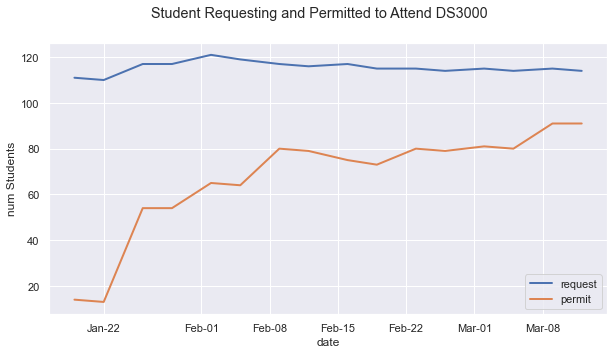

In [32]:
# all dates list
dates = sorted(list(df_nuflex_flatten['date'].unique()))

# permits by date
permits = df_nuflex_flatten.groupby('date')['permit'].sum()

# requests by date
requests = df_nuflex_flatten.groupby('date')['request'].sum()

# for permits and requests, plot features
for feature in ['request', 'permit']:
    if feature == 'permit':
        plt.plot(dates, permits, label = feature, linewidth = 2)
    else:
        plt.plot(dates, requests, label = feature, linewidth = 2)
        
# labels
plt.xlabel('date')
plt.ylabel('num Students')
plt.suptitle('Student Requesting and Permitted to Attend DS3000')

# x labels
my_fmt = mdates.DateFormatter('%b-%d')
plt.gca().xaxis.set_major_formatter(my_fmt) 

# legend
plt.legend()

# resize plot
plt.gcf().set_size_inches((10, 5))

plt.show()